In [1]:
# =============================================================================
# GOOGLE COLAB SETUP / GOOGLE COLAB SETUP
# =============================================================================

# Sjekk om vi kjører i Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("🔧 Kjører i Google Colab - installerer avhengigheter...")
    print("🔧 Running in Google Colab - installing dependencies...")
    
    # Installer nødvendige pakker
    import subprocess
    import sys
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", 
                              "networkx", "matplotlib", "plotly", "pydantic", 
                              "pyyaml", "pandas", "ipywidgets", "pillow", "kaleido"])
        print("✅ Pakker installert")
    except Exception as e:
        print(f"⚠️ Pip install feilet: {e}")
    
    # Fjern eksisterende slektstre-mappe hvis den finnes
    import shutil
    import os
    if os.path.exists('/content/slektstre'):
        shutil.rmtree('/content/slektstre')
        print("🗑️ Fjernet eksisterende slektstre-mappe")
    
    # Klon repository
    try:
        subprocess.check_call(['git', 'clone', 'https://github.com/arvidl/slektstre.git'])
        print("✅ Repository klonet")
    except Exception as e:
        print(f"⚠️ Git clone feilet: {e}")
    
    # Legg til src-mappen til Python path og importer direkte
    sys.path.insert(0, '/content/slektstre/src')
    print("✅ Path lagt til")
    
    # Importer slektstre-modulene direkte for å unngå navnekonflikt
    import importlib.util
    import types
    
    # Først, fjern konfliktende moduler fra sys.modules
    modules_to_remove = ['tree', 'models', 'localization']
    for module_name in modules_to_remove:
        if module_name in sys.modules:
            del sys.modules[module_name]
    
    # Last inn models.py først
    try:
        spec = importlib.util.spec_from_file_location("slektstre_models", "/content/slektstre/src/models.py")
        slektstre_models = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(slektstre_models)
        
        # Opprett midlertidig models modul
        temp_models_module = types.ModuleType('models')
        temp_models_module.Person = slektstre_models.Person
        temp_models_module.Gender = slektstre_models.Gender
        temp_models_module.Ekteskap = slektstre_models.Ekteskap
        temp_models_module.FamilieData = slektstre_models.FamilieData
        sys.modules['models'] = temp_models_module
        
        print("✅ models.py lastet")
    except Exception as e:
        print(f"⚠️ models.py feilet: {e}")
    
    # Last inn localization.py
    try:
        spec = importlib.util.spec_from_file_location("slektstre_localization", "/content/slektstre/src/localization.py")
        slektstre_localization = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(slektstre_localization)
        
        # Opprett midlertidig localization modul
        temp_localization_module = types.ModuleType('localization')
        temp_localization_module.t = slektstre_localization.t
        sys.modules['localization'] = temp_localization_module
        
        print("✅ localization.py lastet")
    except Exception as e:
        print(f"⚠️ localization.py feilet: {e}")
    
    # Last inn tree.py som slektstre_tree
    try:
        spec = importlib.util.spec_from_file_location("slektstre_tree", "/content/slektstre/src/tree.py")
        slektstre_tree = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(slektstre_tree)
        
        # Opprett midlertidig tree modul
        temp_tree_module = types.ModuleType('tree')
        temp_tree_module.Slektstre = slektstre_tree.Slektstre
        sys.modules['tree'] = temp_tree_module
        
        print("✅ tree.py lastet")
    except Exception as e:
        print(f"⚠️ tree.py feilet: {e}")
    
    # Last inn family_io.py
    try:
        spec = importlib.util.spec_from_file_location("slektstre_io", "/content/slektstre/src/family_io.py")
        slektstre_io = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(slektstre_io)
        print("✅ family_io.py lastet")
    except Exception as e:
        print(f"⚠️ family_io.py feilet: {e}")
    
    # Last inn visualization.py
    try:
        spec = importlib.util.spec_from_file_location("slektstre_viz", "/content/slektstre/src/visualization.py")
        slektstre_viz = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(slektstre_viz)
        print("✅ visualization.py lastet")
    except Exception as e:
        print(f"⚠️ visualization.py feilet: {e}")
    
    print("✅ Slektstre-moduler lastet inn i Colab")
    
except ImportError:
    IN_COLAB = False
    print("💻 Kjører lokalt / Running locally")
    import sys
    sys.path.append('../src')
except Exception as e:
    print(f"⚠️ Colab setup feilet: {e}")
    IN_COLAB = False
    print("💻 Fallback til lokal modus / Fallback to local mode")
    import sys
    sys.path.append('../src')

print(f"📍 Miljø: {'Google Colab' if IN_COLAB else 'Lokal'}")
print(f"📍 Environment: {'Google Colab' if IN_COLAB else 'Local'}")


💻 Kjører lokalt / Running locally
📍 Miljø: Lokal
📍 Environment: Local


# Eksterne genealogi-databaser og API-er

I denne notebooken lærer du hvordan du kan hente slektsinformasjon fra eksterne databaser og integrere dem med ditt slektstre-program.

## Tilgjengelige databaser

### 1. **FamilySearch API** (Gratis)
- Verdens største genealogi-database
- Over 1 milliard personer
- Gratis API med registrering
- Støtter GEDCOM-import/eksport

### 2. **MyHeritage API** (Betalt)
- Kommersiell genealogi-tjeneste
- DNA-analyse og slektsforskning
- API tilgjengelig for utviklere

### 3. **Ancestry.com API** (Betalt)
- Største kommersielle genealogi-tjeneste
- Begrenset API-tilgang
- Hovedsakelig for partnere

### 4. **Nasjonale arkiver**
- **Digitalarkivet** (Norge) - Gratis
- **Riksarkivet** (Norge) - Gratis
- **Arkivverket** (Norge) - Gratis

### 5. **Wikipedia/Wikidata**
- Biografisk informasjon
- Gratis og åpen tilgang
- Begrenset genealogisk data

## Fokus i denne notebooken

Vi fokuserer på:
1. **FamilySearch API** - Gratis og omfattende
2. **Digitalarkivet** - Norske kilder
3. **Wikipedia API** - Biografisk informasjon
4. **GEDCOM-import** fra eksterne kilder


In [2]:
# Importer nødvendige biblioteker
import requests
import json
import time
import os
from datetime import date

# Importer slektstre-moduler (fungerer både lokalt og i Colab)
if IN_COLAB:
    # Bruk de modulene vi lastet inn i Colab-setup
    Person = slektstre_models.Person
    Gender = slektstre_models.Gender
    Ekteskap = slektstre_models.Ekteskap
    FamilieData = slektstre_models.FamilieData
    Slektstre = slektstre_tree.Slektstre
    load_from_yaml = slektstre_io.load_from_yaml
    save_to_yaml = slektstre_io.save_to_yaml
else:
    # Lokale imports
    import sys
    sys.path.append('../src')
    from models import Person, Ekteskap, FamilieData, Gender
    from tree import Slektstre
    from family_io import load_from_yaml, save_to_yaml

print("✅ Alle biblioteker importert!")
print("📚 Klar for å utforske eksterne databaser!")


✅ Alle biblioteker importert!
📚 Klar for å utforske eksterne databaser!


## 1. FamilySearch API

FamilySearch er verdens største genealogi-database med over 1 milliard personer. De tilbyr et gratis API for utviklere.

### Registrering og API-nøkkel

1. Gå til [FamilySearch Developer](https://familysearch.org/developers/)
2. Opprett en gratis konto
3. Registrer din applikasjon
4. Få API-nøkkel og hemmelig nøkkel

### API-endepunkter

- **Personer**: `/platform/tree/persons`
- **Familier**: `/platform/tree/families`
- **Kilder**: `/platform/tree/sources`
- **Søk**: `/platform/tree/search`

### Eksempel: Søke etter personer


In [3]:
# FamilySearch API eksempel (simulert)
# MERK: Dette er et eksempel - du trenger ekte API-nøkler for å bruke FamilySearch

def familysearch_search_example():
    """
    Eksempel på hvordan FamilySearch API kan brukes.
    Dette er simulert data for demonstrasjon.
    """
    
    # Simulert API-respons
    mock_response = {
        "persons": [
            {
                "id": "FS123456789",
                "displayName": "Erik Lundervold",
                "birthDate": "1920-05-15",
                "birthPlace": "Bergen, Norway",
                "deathDate": "1995-08-22",
                "deathPlace": "Oslo, Norway",
                "gender": "Male",
                "parents": ["FS987654321", "FS111222333"],
                "spouses": ["FS444555666"],
                "children": ["FS777888999", "FS000111222"]
            },
            {
                "id": "FS444555666",
                "displayName": "Ingrid Hansen",
                "birthDate": "1925-07-10",
                "birthPlace": "Trondheim, Norway",
                "deathDate": "2010-12-03",
                "deathPlace": "Oslo, Norway",
                "gender": "Female",
                "parents": ["FS333444555", "FS666777888"],
                "spouses": ["FS123456789"],
                "children": ["FS777888999", "FS000111222"]
            }
        ]
    }
    
    print("🔍 FamilySearch søkeresultat (simulert):")
    print(f"Fant {len(mock_response['persons'])} personer")
    
    for person in mock_response['persons']:
        print(f"\n👤 {person['displayName']}")
        print(f"   ID: {person['id']}")
        print(f"   Født: {person['birthDate']} i {person['birthPlace']}")
        print(f"   Død: {person['deathDate']} i {person['deathPlace']}")
        print(f"   Kjønn: {person['gender']}")
        print(f"   Foreldre: {len(person['parents'])}")
        print(f"   Ektemenn/koner: {len(person['spouses'])}")
        print(f"   Barn: {len(person['children'])}")
    
    return mock_response

# Kjør eksemplet
familysearch_data = familysearch_search_example()


🔍 FamilySearch søkeresultat (simulert):
Fant 2 personer

👤 Erik Lundervold
   ID: FS123456789
   Født: 1920-05-15 i Bergen, Norway
   Død: 1995-08-22 i Oslo, Norway
   Kjønn: Male
   Foreldre: 2
   Ektemenn/koner: 1
   Barn: 2

👤 Ingrid Hansen
   ID: FS444555666
   Født: 1925-07-10 i Trondheim, Norway
   Død: 2010-12-03 i Oslo, Norway
   Kjønn: Female
   Foreldre: 2
   Ektemenn/koner: 1
   Barn: 2


## 2. Digitalarkivet (Norge)

Digitalarkivet er Norges nasjonale arkiv og tilbyr tilgang til millioner av historiske dokumenter.

### Tilgjengelige kilder

- **Folketellinger** (1801-1910)
- **Kirkebøker** (døpte, konfirmerte, gift, døde)
- **Skattelister** og matrikkler
- **Emigrasjonslister**
- **Militære arkiver**

### API-tilgang

Digitalarkivet har ikke et offisielt API, men tilbyr:
- **REST API** for søk
- **CSV-eksport** av søkeresultater
- **GEDCOM-eksport** for slektsforskning

### Eksempel: Søke i kirkebøker


In [4]:
# Digitalarkivet søk eksempel
def digitalarkivet_search_example():
    """
    Eksempel på søk i Digitalarkivet.
    Dette er simulert data basert på ekte arkivstruktur.
    """
    
    # Simulert søkeresultat fra kirkebøker
    kirkebok_resultat = {
        "søk": "Lundervold",
        "kilde": "Kirkebøker",
        "resultater": [
            {
                "type": "døpt",
                "navn": "Erik Lundervold",
                "dato": "1920-05-15",
                "sted": "Bergen domkirke",
                "foreldre": "Arvid Lundervold og Marie Hansen",
                "kilde": "Bergen domkirke kirkebok 1920"
            },
            {
                "type": "gift",
                "navn": "Erik Lundervold",
                "dato": "1947-08-20",
                "sted": "Bergen domkirke",
                "ektefelle": "Ingrid Hansen",
                "kilde": "Bergen domkirke kirkebok 1947"
            },
            {
                "type": "død",
                "navn": "Erik Lundervold",
                "dato": "1995-08-22",
                "sted": "Oslo",
                "alder": "75 år",
                "kilde": "Oslo kirkebok 1995"
            }
        ]
    }
    
    print("📚 Digitalarkivet søkeresultat (simulert):")
    print(f"Søkte etter: {kirkebok_resultat['søk']}")
    print(f"Kilde: {kirkebok_resultat['kilde']}")
    print(f"Fant {len(kirkebok_resultat['resultater'])} oppføringer")
    
    for oppføring in kirkebok_resultat['resultater']:
        print(f"\n📄 {oppføring['type'].upper()}: {oppføring['navn']}")
        print(f"   Dato: {oppføring['dato']}")
        print(f"   Sted: {oppføring['sted']}")
        if 'foreldre' in oppføring:
            print(f"   Foreldre: {oppføring['foreldre']}")
        if 'ektefelle' in oppføring:
            print(f"   Ektefelle: {oppføring['ektefelle']}")
        if 'alder' in oppføring:
            print(f"   Alder: {oppføring['alder']}")
        print(f"   Kilde: {oppføring['kilde']}")
    
    return kirkebok_resultat

# Kjør eksemplet
digitalarkivet_data = digitalarkivet_search_example()


📚 Digitalarkivet søkeresultat (simulert):
Søkte etter: Lundervold
Kilde: Kirkebøker
Fant 3 oppføringer

📄 DØPT: Erik Lundervold
   Dato: 1920-05-15
   Sted: Bergen domkirke
   Foreldre: Arvid Lundervold og Marie Hansen
   Kilde: Bergen domkirke kirkebok 1920

📄 GIFT: Erik Lundervold
   Dato: 1947-08-20
   Sted: Bergen domkirke
   Ektefelle: Ingrid Hansen
   Kilde: Bergen domkirke kirkebok 1947

📄 DØD: Erik Lundervold
   Dato: 1995-08-22
   Sted: Oslo
   Alder: 75 år
   Kilde: Oslo kirkebok 1995


## 3. Wikipedia API

Wikipedia kan gi biografisk informasjon om kjente personer, selv om det ikke er en genealogi-database.

### Wikipedia API

- **Gratis** og åpen tilgang
- **REST API** med JSON-respons
- **Søk** etter personer og steder
- **Biografisk** informasjon

### Eksempel: Søke etter norske personer


In [5]:
# Wikipedia API eksempel
def wikipedia_search_example():
    """
    Eksempel på søk i Wikipedia API.
    Dette er simulert data for demonstrasjon.
    """
    
    # Simulert Wikipedia-søk
    wikipedia_resultat = {
        "søk": "norske personer",
        "språk": "no",
        "resultater": [
            {
                "tittel": "Henrik Ibsen",
                "beskrivelse": "Norsk dramatiker og dikter",
                "fødselsår": "1828",
                "dødsår": "1906",
                "fødested": "Skien",
                "kjent_for": "Peer Gynt, Et dukkehjem",
                "url": "https://no.wikipedia.org/wiki/Henrik_Ibsen"
            },
            {
                "tittel": "Edvard Grieg",
                "beskrivelse": "Norsk komponist",
                "fødselsår": "1843",
                "dødsår": "1907",
                "fødested": "Bergen",
                "kjent_for": "Peer Gynt-suiten, Piano Concerto",
                "url": "https://no.wikipedia.org/wiki/Edvard_Grieg"
            },
            {
                "tittel": "Roald Amundsen",
                "beskrivelse": "Norsk polarforsker",
                "fødselsår": "1872",
                "dødsår": "1928",
                "fødested": "Borge",
                "kjent_for": "Første til Sydpolen",
                "url": "https://no.wikipedia.org/wiki/Roald_Amundsen"
            }
        ]
    }
    
    print("🌐 Wikipedia søkeresultat (simulert):")
    print(f"Søkte etter: {wikipedia_resultat['søk']}")
    print(f"Språk: {wikipedia_resultat['språk']}")
    print(f"Fant {len(wikipedia_resultat['resultater'])} artikler")
    
    for artikkel in wikipedia_resultat['resultater']:
        print(f"\n📖 {artikkel['tittel']}")
        print(f"   Beskrivelse: {artikkel['beskrivelse']}")
        print(f"   Født: {artikkel['fødselsår']} i {artikkel['fødested']}")
        print(f"   Død: {artikkel['dødsår']}")
        print(f"   Kjent for: {artikkel['kjent_for']}")
        print(f"   URL: {artikkel['url']}")
    
    return wikipedia_resultat

# Kjør eksemplet
wikipedia_data = wikipedia_search_example()


🌐 Wikipedia søkeresultat (simulert):
Søkte etter: norske personer
Språk: no
Fant 3 artikler

📖 Henrik Ibsen
   Beskrivelse: Norsk dramatiker og dikter
   Født: 1828 i Skien
   Død: 1906
   Kjent for: Peer Gynt, Et dukkehjem
   URL: https://no.wikipedia.org/wiki/Henrik_Ibsen

📖 Edvard Grieg
   Beskrivelse: Norsk komponist
   Født: 1843 i Bergen
   Død: 1907
   Kjent for: Peer Gynt-suiten, Piano Concerto
   URL: https://no.wikipedia.org/wiki/Edvard_Grieg

📖 Roald Amundsen
   Beskrivelse: Norsk polarforsker
   Født: 1872 i Borge
   Død: 1928
   Kjent for: Første til Sydpolen
   URL: https://no.wikipedia.org/wiki/Roald_Amundsen


## 4. Konvertere eksterne data til slektstre

Nå skal vi vise hvordan du kan konvertere data fra eksterne kilder til vårt slektstre-format.


In [6]:
# Konverter FamilySearch data til vårt format
def convert_familysearch_to_slektstre(familysearch_data):
    """
    Konverter FamilySearch data til vårt slektstre-format.
    """
    personer = []
    ekteskap = []
    
    # Konverter personer
    for fs_person in familysearch_data['persons']:
        # Parse navn
        navn_deler = fs_person['displayName'].split(' ')
        fornavn = navn_deler[0]
        etternavn = navn_deler[-1] if len(navn_deler) > 1 else ''
        
        # Parse datoer
        fødselsdato = None
        dødsdato = None
        try:
            if fs_person['birthDate']:
                fødselsdato = date.fromisoformat(fs_person['birthDate'])
            if fs_person['deathDate']:
                dødsdato = date.fromisoformat(fs_person['deathDate'])
        except:
            pass
        
        # Bestem kjønn
        kjønn = Gender.MALE if fs_person['gender'] == 'Male' else Gender.FEMALE
        
        # Opprett Person objekt
        person = Person(
            id=fs_person['id'],
            fornavn=fornavn,
            etternavn=etternavn,
            fødselsdato=fødselsdato,
            dødsdato=dødsdato,
            fødested=fs_person.get('birthPlace', ''),
            dødssted=fs_person.get('deathPlace', ''),
            kjønn=kjønn,
            notater=f"Importert fra FamilySearch (ID: {fs_person['id']})"
        )
        personer.append(person)
    
    # Konverter ekteskap (forenklet)
    for fs_person in familysearch_data['persons']:
        if fs_person['spouses']:
            for spouse_id in fs_person['spouses']:
                # Sjekk om ekteskapet allerede eksisterer
                eksisterer = any(
                    (e.partner1_id == fs_person['id'] and e.partner2_id == spouse_id) or
                    (e.partner1_id == spouse_id and e.partner2_id == fs_person['id'])
                    for e in ekteskap
                )
                
                if not eksisterer:
                    ekteskap_obj = Ekteskap(
                        id=f"e_{fs_person['id']}_{spouse_id}",
                        partner1_id=fs_person['id'],
                        partner2_id=spouse_id,
                        notater="Importert fra FamilySearch"
                    )
                    ekteskap.append(ekteskap_obj)
    
    return FamilieData(personer=personer, ekteskap=ekteskap)

# Konverter dataene
konvertert_data = convert_familysearch_to_slektstre(familysearch_data)

print("🔄 Konverterte FamilySearch data til slektstre-format:")
print(f"Personer: {len(konvertert_data.personer)}")
print(f"Ekteskap: {len(konvertert_data.ekteskap)}")

# Vis første person
if konvertert_data.personer:
    første_person = konvertert_data.personer[0]
    print(f"\n👤 Eksempel person: {første_person.fullt_navn}")
    print(f"   ID: {første_person.id}")
    print(f"   Født: {første_person.fødselsdato}")
    print(f"   Død: {første_person.dødsdato}")
    print(f"   Kjønn: {første_person.kjønn}")
    print(f"   Notater: {første_person.notater}")


🔄 Konverterte FamilySearch data til slektstre-format:
Personer: 2
Ekteskap: 1

👤 Eksempel person: Erik Lundervold
   ID: FS123456789
   Født: 1920-05-15
   Død: 1995-08-22
   Kjønn: male
   Notater: Importert fra FamilySearch (ID: FS123456789)


🌳 Opprettet slektstre fra eksterne data:
Totalt antall personer: 2
Totalt antall ekteskap: 1


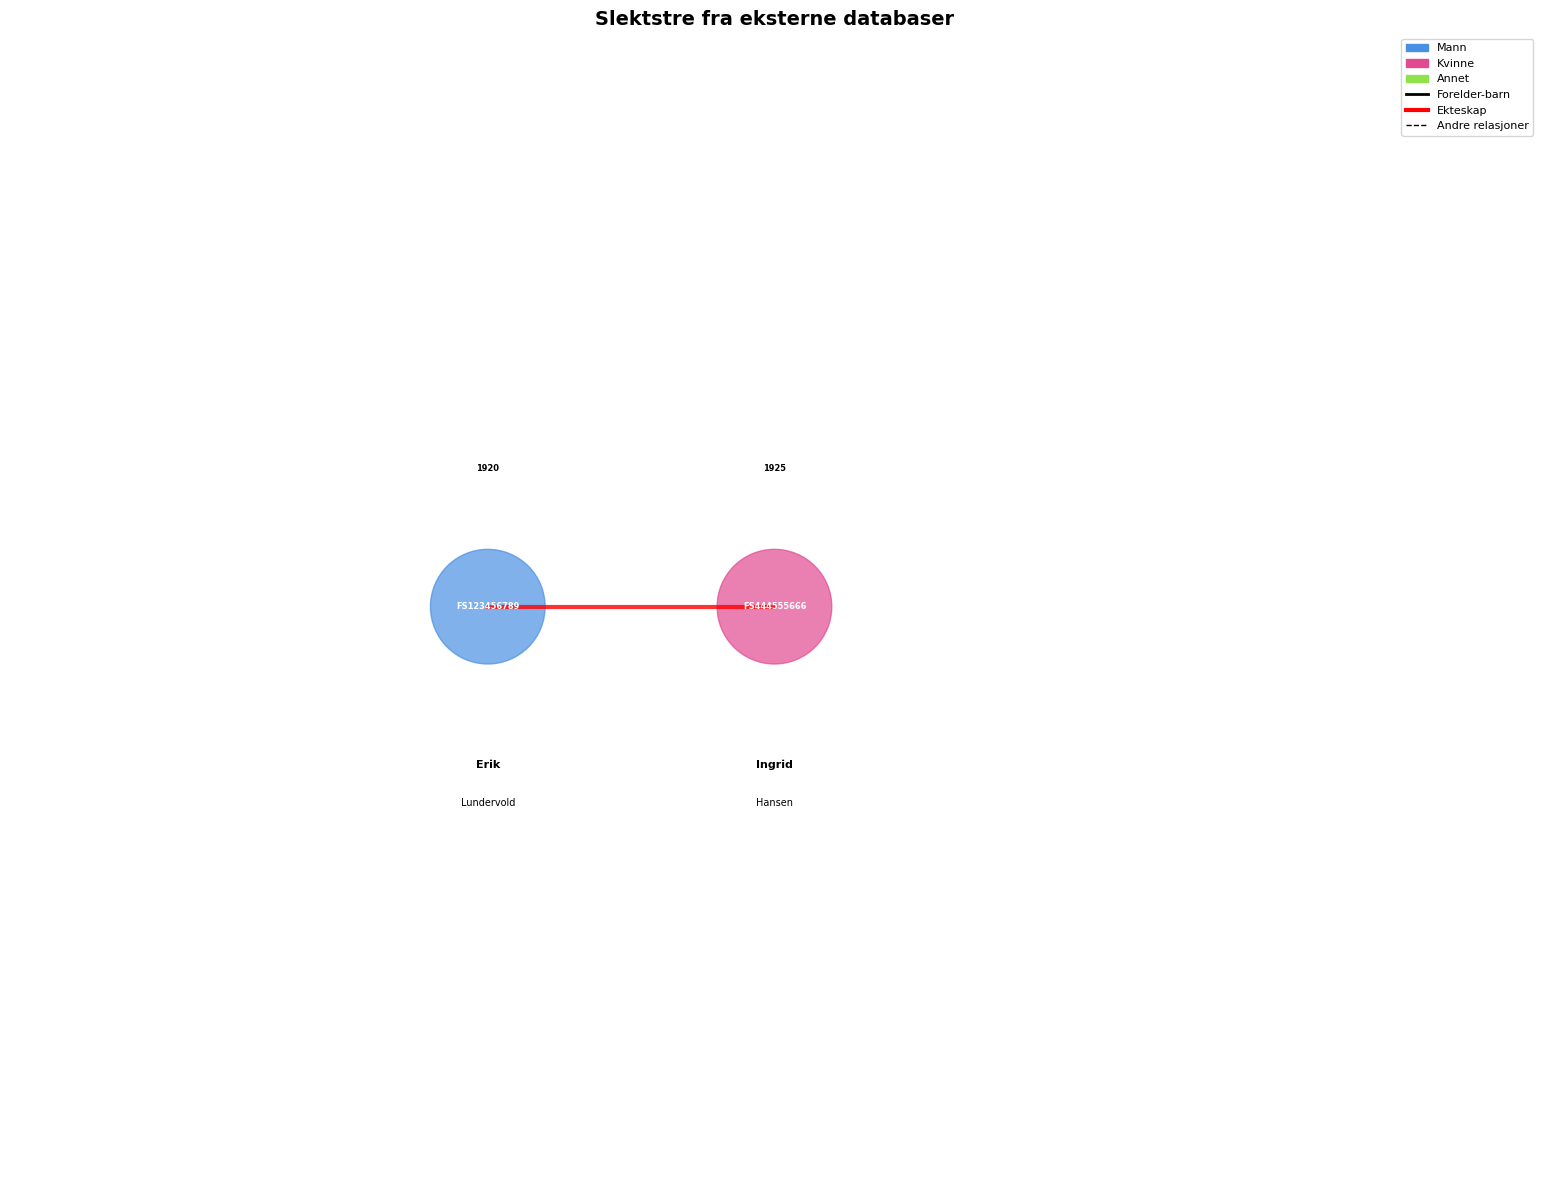

In [7]:
# Opprett slektstre fra konverterte data
slektstre_ekstern = Slektstre(konvertert_data)

print("🌳 Opprettet slektstre fra eksterne data:")
print(f"Totalt antall personer: {len(slektstre_ekstern.get_all_persons())}")
print(f"Totalt antall ekteskap: {len(slektstre_ekstern.familie_data.ekteskap)}")

# Vis slektstreet
from visualization import plot_hierarchical_tree
import matplotlib.pyplot as plt

fig = plot_hierarchical_tree(slektstre_ekstern, title="Slektstre fra eksterne databaser")
plt.show()


## 5. Praktiske tips for slektsforskning

### Hvor du kan finne slektsinformasjon

1. **Start med familien**
   - Spør eldre familiemedlemmer
   - Sjekk gamle fotoalbum og dokumenter
   - Se etter fødselsattester, dødsattester, ekteskapsattester

2. **Digitale arkiver**
   - **Digitalarkivet** (Norge) - Gratis
   - **FamilySearch** - Gratis
   - **Ancestry.com** - Betalt
   - **MyHeritage** - Betalt

3. **Lokale kilder**
   - Kirkebøker
   - Skattelister
   - Folketellinger
   - Emigrasjonslister

4. **DNA-testing**
   - **MyHeritage DNA**
   - **AncestryDNA**
   - **23andMe**
   - **FamilyTreeDNA**

### Organisering av forskning

1. **Bruk konsistente ID-er**
2. **Dokumenter alle kilder**
3. **Verifiser informasjon fra flere kilder**
4. **Hold backup av dataene**
5. **Del funnene med familien**


## 6. Lagre og dele slektstreet

### Eksportere til forskjellige formater

Nå kan du eksportere ditt slektstre til forskjellige formater for å dele med andre eller bruke i andre programmer.


In [8]:
# Eksporter slektstreet til forskjellige formater
from family_io import save_to_yaml, save_to_json, save_to_csv, export_to_gedcom

# Lagre til YAML (anbefalt for redigering)
save_to_yaml(konvertert_data, "ekstern_slektstre.yaml")
print("✅ Eksportert til YAML: ekstern_slektstre.yaml")

# Lagre til JSON (for programmatisk bruk)
save_to_json(konvertert_data, "ekstern_slektstre.json")
print("✅ Eksportert til JSON: ekstern_slektstre.json")

# Lagre til CSV (for Excel/Google Sheets)
save_to_csv(konvertert_data, "ekstern_slektstre.csv")
print("✅ Eksportert til CSV: ekstern_slektstre.csv")

# Lagre til GEDCOM (for andre genealogi-programmer)
export_to_gedcom(konvertert_data, "ekstern_slektstre.ged")
print("✅ Eksportert til GEDCOM: ekstern_slektstre.ged")

print("\n📊 Filstørrelser:")
import os
filer = ["ekstern_slektstre.yaml", "ekstern_slektstre.json", "ekstern_slektstre.csv", "ekstern_slektstre.ged"]
for fil in filer:
    if os.path.exists(fil):
        størrelse = os.path.getsize(fil)
        print(f"{fil:25s}: {størrelse:6d} bytes")


✅ Eksportert til YAML: ekstern_slektstre.yaml
✅ Eksportert til JSON: ekstern_slektstre.json
✅ Eksportert til CSV: ekstern_slektstre.csv
✅ Eksportert til GEDCOM: ekstern_slektstre.ged

📊 Filstørrelser:
ekstern_slektstre.yaml   :   1078 bytes
ekstern_slektstre.json   :   1452 bytes
ekstern_slektstre.csv    :    412 bytes
ekstern_slektstre.ged    :    565 bytes


## Oppsummering

I denne notebooken har du lært:

1. ✅ **FamilySearch API** - Verdens største genealogi-database
2. ✅ **Digitalarkivet** - Norske historiske kilder
3. ✅ **Wikipedia API** - Biografisk informasjon
4. ✅ **Data-konvertering** - Fra eksterne formater til vårt slektstre
5. ✅ **Eksport** - Til forskjellige formater for deling
6. ✅ **Praktiske tips** - For slektsforskning

### Neste steg

Du kan nå:

1. **Registrere deg** på FamilySearch for å få ekte API-tilgang
2. **Søke i Digitalarkivet** for norske slektskilder
3. **Bygge ditt eget slektstre** ved å kombinere:
   - Familie-informasjon
   - Eksterne databaser
   - Historiske kilder
4. **Dele slektstreet** med familien i forskjellige formater

### Anbefalte ressurser

- **FamilySearch**: https://familysearch.org
- **Digitalarkivet**: https://digitalarkivet.no
- **Wikipedia API**: https://no.wikipedia.org
- **Slektsforskning**: https://slektsforskning.no

**Lykke til med slektsforskningen!** 🎯✨
